In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# get data
import RGC_Flicker
#from RGC_Flicker import get_flicker
reload(RGC_Flicker)
X_train, y_train, X_val, y_val, X_test, y_test = RGC_Flicker.get_flicker(num_classes=1)

In [136]:
print y_train.shape
print y_train[:2]
print X_train[:2, :]

(37000,)
[0 0]
[[ 0.47953596 -0.4804704   0.47953596 -0.48046404 -0.48045769 -0.48046404
  -0.48046404 -0.48046404 -0.48045769  0.47954231 -0.48045769  0.47954231
   0.47954867 -0.48044497  0.47956138  0.47956138 -0.48043226  0.4795741
  -0.4804259   0.4795741 ]
 [ 0.47953596  0.4795296   0.47953596 -0.48046404  0.47954231 -0.48046404
   0.47953596 -0.48046404 -0.48045769  0.47954231  0.47954231  0.47954231
  -0.48045133  0.47955503 -0.48043862  0.47956138 -0.48043226  0.4795741
  -0.4804259   0.4795741 ]]


In [52]:
print 'Proportion of 0s: ', float(len(np.where(y_train[:,0] == 1.)[0])) / y_train.shape[0]

Proportion of 0s:  0.816540540541


Train on 37000 samples, validate on 5000 samples
Epoch 1/10
5s - loss: 2.1983 - mean_squared_error: 0.4682 - val_loss: 0.4604 - val_mean_squared_error: 0.2410
Epoch 2/10
4s - loss: 1.3832 - mean_squared_error: 0.2289 - val_loss: 0.3733 - val_mean_squared_error: 0.1956
Epoch 3/10
4s - loss: 1.0575 - mean_squared_error: 0.2399 - val_loss: 0.4045 - val_mean_squared_error: 0.1814
Epoch 4/10
5s - loss: 0.8467 - mean_squared_error: 0.1997 - val_loss: 0.4835 - val_mean_squared_error: 0.2088
Epoch 5/10
4s - loss: 0.6913 - mean_squared_error: 0.1941 - val_loss: 0.3482 - val_mean_squared_error: 0.1621
Epoch 6/10
5s - loss: 0.5901 - mean_squared_error: 0.1855 - val_loss: 0.3465 - val_mean_squared_error: 0.1610
Epoch 7/10
4s - loss: 0.5457 - mean_squared_error: 0.1939 - val_loss: 0.3524 - val_mean_squared_error: 0.1754
Epoch 8/10
4s - loss: 0.4970 - mean_squared_error: 0.1817 - val_loss: 0.3284 - val_mean_squared_error: 0.1538
Epoch 9/10
4s - loss: 0.4627 - mean_squared_error: 0.1747 - val_loss: 0

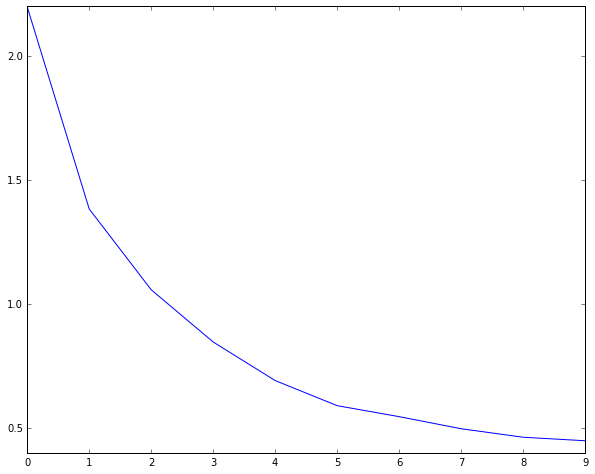

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.regularizers import l2, activity_l2, l1, activity_l1
from keras.optimizers import RMSprop
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
import time 

model = Sequential()

hidden_num = 100
stim_bin = 20
num_classes = 1
val_data = X_val, y_val

# layer 1
model.add(Dense(output_dim=hidden_num, input_dim=stim_bin, W_regularizer=l2(0.01)))
model.add(Activation("relu"))
model.add(Dropout(0.8))

# layer 2
model.add(Dense(output_dim=200, input_dim=hidden_num, W_regularizer=l2(0.01)))
model.add(Activation("relu"))
model.add(Dropout(0.5))

# output layer 
model.add(Dense(output_dim=num_classes, W_regularizer=l1(0.01), W_constraint = maxnorm(2)))
model.add(Activation("relu"))

best_acc = 0.
best_batch = 0
best_hist = None

model.compile(loss='poisson', optimizer='SGD', metrics=['mean_squared_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=2) # stop early if loss goes up for 2 epochs
hist = model.fit(X_train, y_train, nb_epoch=10, batch_size=32, verbose=2, validation_data=val_data, callbacks=[early_stopping])
time.sleep(0.2)
loss_and_metrics = model.evaluate(X_test, y_test)

plt.plot(hist.history['loss'])

In [10]:
print model.metrics_names
print loss_and_metrics
print -np.log(loss_and_metrics[0]) * len(X_test)

['loss', 'mean_squared_error']
[0.31030034845144977, 0.14044566708554823]
12287.2531381


In [129]:
y_train[:100]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0])

In [11]:
print y_test[:10]
print model.predict(X_test[:10, :])

[0 0 0 0 1 0 0 0 0 0]
[[ 0.02609914]
 [ 0.18385898]
 [ 0.        ]
 [ 0.00707949]
 [ 0.64367384]
 [ 0.        ]
 [ 0.        ]
 [ 0.37021631]
 [ 0.04707075]
 [ 0.00189704]]


In [159]:
y_train[:10]
X_test[:10]

array([[-0.48046404,  0.4795296 , -0.48046404, -0.48046404, -0.48045769,
        -0.48046404, -0.48046404,  0.47953596,  0.47954231, -0.48045769,
         0.47954231, -0.48045769, -0.48045133, -0.48044497, -0.48043862,
         0.47956138, -0.48043226,  0.4795741 , -0.4804259 , -0.4804259 ],
       [ 0.47953596,  0.4795296 , -0.48046404,  0.47953596,  0.47954231,
        -0.48046404,  0.47953596,  0.47953596, -0.48045769, -0.48045769,
         0.47954231,  0.47954231, -0.48045133, -0.48044497, -0.48043862,
        -0.48043862,  0.47956774,  0.4795741 , -0.4804259 , -0.4804259 ],
       [-0.48046404, -0.4804704 , -0.48046404,  0.47953596, -0.48045769,
         0.47953596, -0.48046404, -0.48046404, -0.48045769, -0.48045769,
        -0.48045769,  0.47954231, -0.48045133, -0.48044497,  0.47956138,
         0.47956138, -0.48043226, -0.4804259 , -0.4804259 , -0.4804259 ],
       [ 0.47953596,  0.4795296 ,  0.47953596,  0.47953596,  0.47954231,
         0.47953596, -0.48046404,  0.47953596, -

In [144]:
ls = []
for layer in model.layers:
    ls.append(layer)
print len(ls)

8
[]


In [156]:
l = len(ls)
for i in xrange(len(ls)):
    if len(np.asarray(ls[i].get_weights())) > 0:
        print np.asarray(ls[i].get_weights())[0].shape

(20, 100)
(100, 200)
(200, 1)


In [7]:
from keras import backend as K
get_1st_layer_output = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[6].output])
print get_1st_layer_output([X_test[:10], 0])[0]

[[ -91.41305542]
 [ -92.17530823]
 [ -62.08726883]
 [-114.32331848]
 [ -67.33665466]
 [ -39.05504227]
 [ -62.91485977]
 [-134.61820984]
 [ -70.95826721]
 [ -71.78538513]]
